# **DASH - Construindo Dashboards para Modelos de Machine Learning**

## UC Irvine - Universidade da California - Doenças Cardíacas

Em 1965, a University of California, Irvine foi fundada com a missão de catalisar a comunidade e melhorar vidas por meio de acadêmicos rigorosos, pesquisa de ponta e serviço público dedicado. Hoje, contamos com o espírito inflexível de nossos professores, funcionários e alunos pioneiros que chegaram ao campus com o sonho de inspirar mudanças e gerar novas ideias. Acreditamos que o verdadeiro progresso é feito quando diferentes perspectivas se unem para avançar nossa compreensão do mundo ao nosso redor. E iluminamos nossas comunidades e apontamos o caminho para um futuro melhor. Na UCI, brilhamos mais.

## Sobre os dados com os quais vamos trabalhar

Os dados com o quais iremos trabalhar serão obtidos do UCI Machine Learning Repository.  
Esses dados foram doados em 1988 e provêm dos resultados clínicos e de testes não invasivos realizados em pacientes submetidos a exames na Cleveland Clinic em Cleveland (Ohio), no Instituto Húngaro de Cardiologia em Budapeste, em um Centro Médico em Long Beach (Califórnia), e também em pacientes de Hospitais universitários em Zurique e Basel (Suíça).

Inicialmente, o conjunto de dados continha 76 variáveis, mas todas as análises realizadas concentram-se no uso de um subconjunto de 14 delas. Vale destacar que, até o momento, o banco de dados da Cleveland Clinic é o único utilizado por pesquisadores de aprendizado de máquina. As análises realizadas com esse banco de dados tem como objetivo distinguir a presença da doença cardíaca (valores 1, 2, 3, 4) da sua ausência (valor 0).

No nosso projeto, substituiremos os valores maiores que zero por 1, o que significa que um valor de 1 indica a presença de doença cardíaca, enquanto um valor de 0 indica a ausência da mesma.

Saber quais são as features do dataset é fundamental para compreender mais a fundo as informações e os padrões que podem indicar a presença ou ausência de doença cardíaca.
Vamos entender mais a fundo as features deste conjunto de dados!

A seguir temos uma explicação sobre cada uma delas:

age: Idade em anos;
sex: Sexo biológico (0 = feminino, 1 = masculino);
cp: Tipo de dor no peito relatada pelo paciente (1= angina típica, 2 = angina atípica, 3 = não angina, 4 = angina assintomática);
Angina é uma condição médica caracterizada por dor ou desconforto no peito.

trestbps: Pressão arterial medida em repouso ;
Pressão arterial é a força que o sangue exerce contra as paredes das artérias à medida que é bombeado pelo coração para o resto do corpo.

chol: Nível de colesterol no sangue em miligramas por decilitro (mg/dl);
fbs: Nível de glicose no sangue em jejum, indicando se está abaixo de 120 mg/dl ou acima de 120 mg/dl (0 = abaixo, 1 = acima);
restecg: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade de onda ST-T, 2 = hipertrofia ventricular esquerda);
O eletrocardiograma, frequentemente abreviado como ECG, é um exame médico que registra a atividade elétrica do coração ao longo do tempo. Quando os resultados da eletrocardiografia (ECG) em repouso são considerados "normais", isso significa que a atividade elétrica do coração está dentro dos padrões regulares. Já quando existe anormalidade da onda ST-T pode ser um indicativo de algum tipo de irregularidade na função cardíaca. Por fim, na hipertrofia ventricular esquerda temos um aumento do tamanho do músculo cardíaco no lado esquerdo do coração.

thalach: Frequência cardíaca máxima alcançada durante um teste de esforço físico;
exang: Indica se houve angina (dor no peito) induzida por exercício ou não (0 = sim, 1 = não);
oldpeak: Medida da depressão do segmento ST induzida pelo exercício em relação ao repouso;
Vamos imaginar o coração como uma bomba, e o eletrocardiograma (ECG) como um gráfico que mostra como essa bomba está funcionando. O segmento ST é como um intervalo na leitura desse gráfico que nos diz quando o coração está relaxando depois de bater. Agora, se durante esse relaxamento, o gráfico mostra uma parte chamada "segmento ST" mais baixa do que o normal, é como se o coração dissesse "Ei, não estou recebendo sangue suficiente aqui!" Essa baixa no gráfico é chamada de depressão do segmento ST.

slope: Inclinação do segmento ST no pico do exercício (1 = inclinado para cima, 2 = plano, 3 = inclinado para baixo);
Esses resultados estão basicamente descrevendo como o coração responde ao esforço físico, olhando para um gráfico do batimento cardíaco e vendo se ele sobe, fica nivelado ou desce nesse momento específico do exercício.

ca: Número de vasos sanguíneos principais coloridos durante o procedimento de fluoroscopia;
A fluoroscopia dos vasos sanguíneos é um exame de imagem para visualizar em tempo real o fluxo de sangue nos vasos sanguíneos.

thal: Resultado do exame de cintilografia com tálio (3 = normal, 6 = defeito fixo, 7 = defeito reversível);
A cintilografia com tálio é um procedimento de imagem que emprega uma substância radioativa para analisar o fluxo sanguíneo e a função cardíaca. Esse exame é valioso para detectar regiões do coração que apresentam comprometimento ou baixa viabilidade.

Agora que temos uma compreensão mais sólida das variáveis em questão, estamos prontos para dar um passo adiante.  
Vamos explorar como criar gráficos estáticos (matplotlib e seaborn) e interativos com o módulo express da biblioteca Plotly, o que nos permitirá visualizar os dados de forma dinâmica.

In [223]:
# Imports

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

In [224]:
# Carrega o dataset de id = 45, name = 'Heart Disease' (Doença Cardíaca)

heart_disease = fetch_ucirepo(id = 45)
#heart_disease = fetch_ucirepo(name = 'Heart Disease')

O comando `df_heart_disease = fetch_ucirepo(id=45)` faz parte de uma função da biblioteca `ucimlrepo`, que é uma interface para acessar os datasets (conjuntos de dados) disponíveis no repositório UCI Machine Learning Repository. O UCI Repository é uma coleção bem conhecida de datasets utilizados para fins de pesquisa e aprendizado de máquina.

Aqui está a explicação detalhada:

1. **`fetch_ucirepo()`**: Esta função é usada para **baixar** ou **carregar** um dataset diretamente do UCI Machine Learning Repository. O objetivo é fornecer uma maneira simples de acessar dados de aprendizado de máquina sem precisar fazer o download manual ou lidar com arquivos.

2. **`id=45`**: O parâmetro `id` se refere ao identificador do dataset específico dentro do repositório UCI. O número `45` corresponde a um dataset específico, que, neste caso, é o **Heart Disease** (Doença Cardíaca), um dataset popular para classificação e análise no campo de aprendizado de máquina.

3. **`df_heart_disease`**: O resultado dessa função é atribuído à variável `df_heart_disease`. Esse objeto contém o dataset correspondente ao `id=45`, e pode incluir informações como as características dos dados (atributos), os rótulos (valores alvo) e possivelmente outras metainformações sobre o conjunto de dados.

Em resumo, esse comando está carregando o dataset de **Doença Cardíaca** a partir do repositório UCI e o armazenando na variável `df_heart_disease`.

In [225]:
# Tipo de Dado

type(heart_disease)

ucimlrepo.dotdict.dotdict

In [226]:
# Separa a Variável Dependente (Target, Alvo) 

alvo = heart_disease.data.targets
alvo

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [227]:
# Separa as Variáveis Independente (Features, Atributos, Características)

caracteristicas = heart_disease.data.features
caracteristicas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


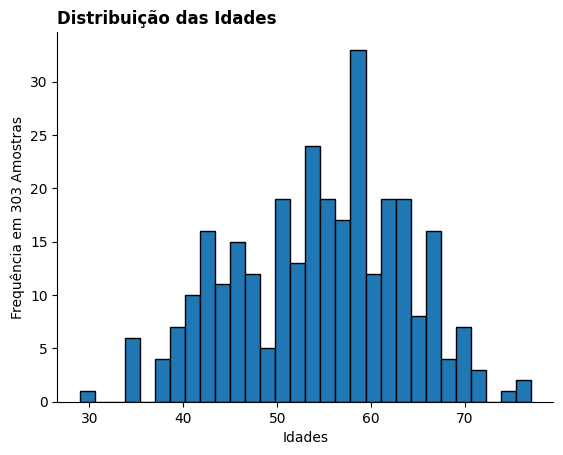

In [268]:
# Distribuição da Idade (age)

# Cria o gráfico
grafico1 = plt.hist(caracteristicas['age'], bins=30, edgecolor='black')

# Título alinhando à esquerda e em negrito
plt.title('Distribuição das Idades', loc='left', fontweight='bold')

# Adiciona os rótulos aos eixos
plt.xlabel('Idades')
plt.ylabel('Frequência em 303 Amostras')

# Remove a borda superior e esquerda
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Exibe o gráfico
plt.show(grafico1)


### Analisando a variável alvo (queremos um valor binário 0 ou 1 , Não Tem ou Tem)

In [229]:
# Verifica valores existentes

alvo.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [230]:
# Essa instrução devolve True ou False

alvo > 0

,num
0,False
1,True
2,True
3,False
4,False
...,...
298,True
299,True
300,True
301,True


In [231]:
# Mas não queremos falsos e verdadeiros, queremos 0s e 1s.
# E aí tem um truque, se multiplicarmos 1 vezes 0s e 1s, falsos e verdadeiros, vai dar 0s e 1s. 0 no false e 1 no true, por quê?
# Porque o true vale 1 e o false vale 0 nessa multiplicação.
# Então, agora sim temos essa coluna binária com o alvo e vamos criar uma coluna 'doenca' e colocar as caracteristicas

caracteristicas["doenca"] = 1 * (heart_disease.data.targets > 0)

In [232]:
# Dataframe resultante

caracteristicas.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,doenca
122,51,1,3,100,222,0,0,143,1,1.2,2,0.0,3.0,0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0,0
200,50,0,4,110,254,0,2,159,0,0.0,1,0.0,3.0,0
244,60,0,3,120,178,1,0,96,0,0.0,1,0.0,3.0,0
281,47,1,3,130,253,0,0,179,0,0.0,1,0.0,3.0,0
110,61,0,4,145,307,0,2,146,1,1.0,2,0.0,7.0,1
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1
140,59,1,2,140,221,0,0,164,1,0.0,1,0.0,3.0,0
28,43,1,4,150,247,0,0,171,0,1.5,1,0.0,3.0,0
107,57,1,3,128,229,0,2,150,0,0.4,2,1.0,7.0,1


In [246]:
# Grafico Interativo - Histograma da Idade com plotly

# Cria um histograma da idade usando Plotly Express
grafico2 = px.histogram(data_frame=caracteristicas, x='age', nbins=30)

# Ajusta o layout do gráfico
grafico2.update_layout(
    title="Distribuição das Idades",
    title_font=dict(weight='bold'), 
    xaxis_title="Idades",
    yaxis_title="Frequência (303 amostras)",
    width=600,
    height=400
)

# Adiciona borda preta em cada barra
grafico2.update_traces(marker=dict(line=dict(color="black", width=1)))

# Exibe o gráfico
grafico2.show()

In [247]:
# Grafico Interativo - Histograma da Pressão Arterial com plotly

# Cria um histograma da pressão arterial usando Plotly Express
grafico3 = px.histogram(data_frame=caracteristicas, x='trestbps', nbins=30)

# Ajusta o layout do gráfico
grafico3.update_layout(
    title="Distribuição da Pressão Arterial Máxima",
    title_font=dict(weight='bold'), 
    xaxis_title="Pressão Arterial Máxima",
    yaxis_title="Frequência (303 amostras)",
    width=600,
    height=400
)

# Adiciona borda preta em cada barra
grafico3.update_traces(marker=dict(line=dict(color="black", width=1)))

# Altera a cor das barras para verde
grafico3.update_traces(marker=dict(color='green'))

# Exibe o gráfico
grafico3.show()

In [248]:
# Grafico Interativo - Histograma do Colesterol com plotly

# Cria um histograma do Colestera usando Plotly Express
grafico4 = px.histogram(data_frame=caracteristicas, x='chol', nbins=30)

# Ajusta o layout do gráfico
grafico4.update_layout(
    title="Distribuição do Colesterol",
    title_font=dict(weight='bold'), 
    xaxis_title="Nível de Colesterol no Sangue (mg/dl)",
    yaxis_title="Frequência (303 amostras)",
    width=600,
    height=400
)

# Adiciona borda preta em cada barra
grafico4.update_traces(marker=dict(line=dict(color="black", width=1)))

# Altera a cor das barras para verde
grafico4.update_traces(marker=dict(color='#FF5733'))

# Exibe o gráfico
grafico4.show()

In [249]:
# Agrupa por idade e calcula a média da pressão arterial
media_pressao_por_idade = caracteristicas.groupby('age')['trestbps'].mean().reset_index()

# Cria o gráfico de barras com a média da pressão arterial no eixo X e as idades no eixo Y
grafico5 = px.bar(media_pressao_por_idade,
             x='trestbps', 
             y='age', 
             title="Média da Pressão Arterial por Idade",
             labels={"trestbps": "Média da Pressão Arterial", "age": "Idade"})

grafico5.update_traces(marker=dict(line=dict(color="blue", width=2)))

# Ajusta o layout do gráfico
grafico5.update_layout(
    title_font=dict(weight='bold'),
    xaxis_title="Média da Pressão Arterial",
    yaxis_title="Idades",
    width=600,
    height=400
)

# Exibe o gráfico
grafico5.show()

In [250]:
# Agrupa por sexo e calcula a média da pressão arterial
media_pressao_por_sexo = caracteristicas.groupby('sex', observed=False)['trestbps'].mean().reset_index()

# Converte a coluna 'sex' para o tipo categórico (se necessário)
media_pressao_por_sexo['sex'] = media_pressao_por_sexo['sex'].astype('category')

# Mapeia cores para 'sex' usando um dicionário
cor_map = {0: '#C435CF', 1: '#0013A6'}

# Cria o gráfico de barras
grafico6 = px.bar(media_pressao_por_sexo, 
             x='sex', 
             y='trestbps', 
             title="Média da Pressão Arterial por Sexo",
             labels={"trestbps": "Média da Pressão Arterial", "sex": "Sexo"},
             color='sex',
             color_discrete_map=cor_map
)

# Ajusta o layout do gráfico
grafico6.update_layout(
    xaxis_title="",
    yaxis_title="Média da Pressão Arterial",
    title_font=dict(weight='bold'),
    width=600,
    height=400,
    showlegend=False,
    xaxis=dict(showticklabels=False),
annotations=[
    dict(
        x=0.2, y=-0.22, 
        xref="paper", yref="paper", 
        text="Feminino                                     Masculino", 
        showarrow=False, 
        font=dict(size=12),
        align="left"
    )
]
)
    
# Exibe o gráfico
grafico6.show()

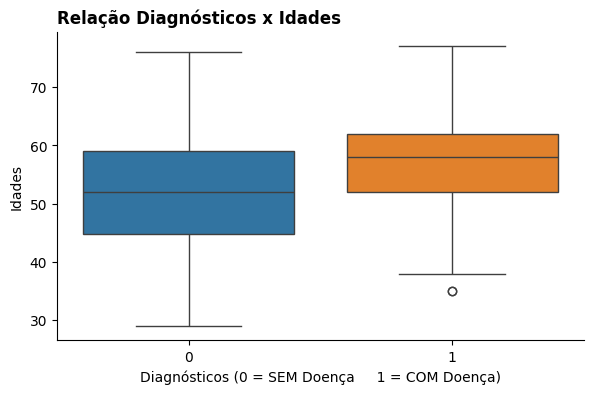

In [261]:
# Grafico Idade x Diagnostico

# Tamanho do gráfico
plt.figure(figsize=(6.8, 4))

# Grafico
grafico7 = sns.boxplot(y = "age", x = "doenca", data = caracteristicas, hue = "doenca")

# Layout do grafico
plt.title("Relação Diagnósticos x Idades", loc='left', fontweight='bold')
plt.xlabel("Diagnósticos (0 = SEM Doença     1 = COM Doença)")
plt.ylabel("Idades")

# Configura bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Remove a legenda
plt.legend([],[], frameon=False)
    
#Exibe o grafico   
plt.show()

## Criação de arquivo que será utilizado em modelo de machine learning

In [239]:
# Tipo de Dados

type(caracteristicas)

pandas.core.frame.DataFrame

In [240]:
# Exibe dados

caracteristicas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,doenca
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [241]:
# Informações

caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  doenca    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [242]:
# Transforma em arquivo CSV

caracteristicas.to_csv('../dados/dados_para_modelo.csv', index = False)

# **FIM**